In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
sns.set()
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
sns.set_theme()
sns.set_style("whitegrid")
sns.set_context("poster", font_scale = 1)

In [2]:
os.chdir("/Users/Ellen/Documents/Dokumenter/DTU/7. Semester/Bachelor")

data = "data.csv"
df =  pd.read_csv(data)

In [3]:
stop = df.groupby(['userId']).count()['incrementalId'].reset_index()

In [4]:
#If assumed, all users is part of the data in 60 days. 
stop['avgStop'] = stop['incrementalId']/60

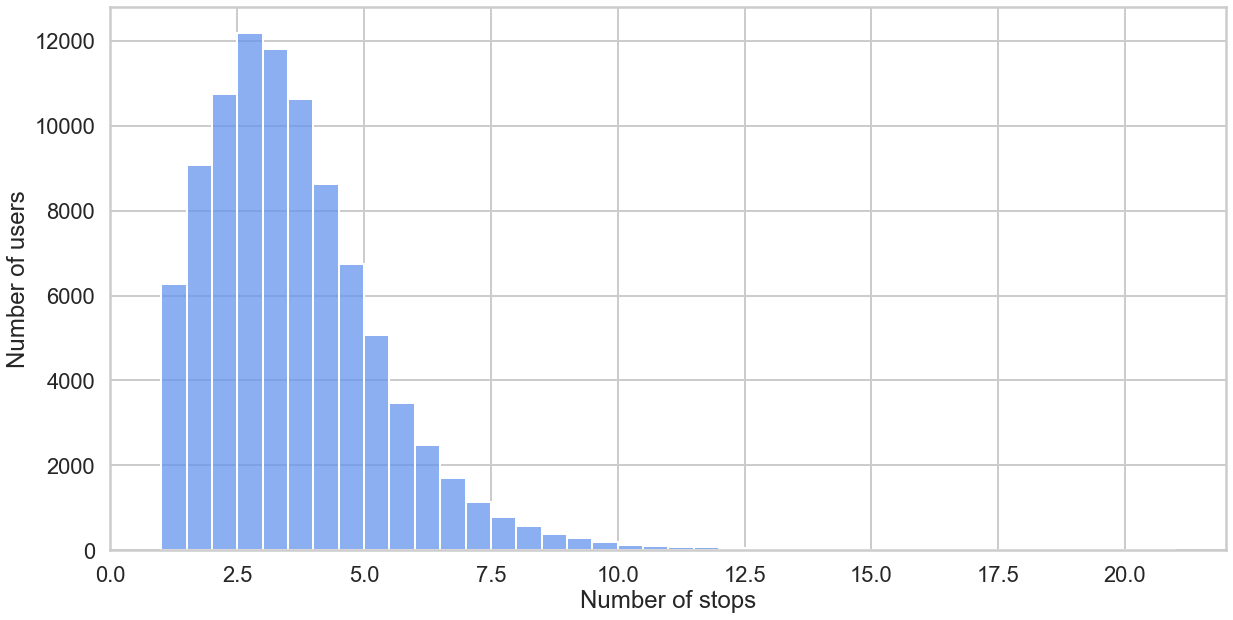

In [5]:
#Average number of stops per day for each user
os.chdir("/Users/Ellen/Documents/Dokumenter/DTU/7. Semester/Bachelor/Plots")

sns.histplot(data=stop, x="avgStop", binwidth = 0.5, color='cornflowerblue')
plt.ylabel('Number of users')
plt.xlabel('Number of stops')
plt.savefig('avgStopDay.png', bbox_inches='tight') #Save plot
plt.show()

In [6]:
stop['avgStop'].median()

3.3333333333333335

In [7]:
stop['avgHStop'] = stop['incrementalId']/(60*24)

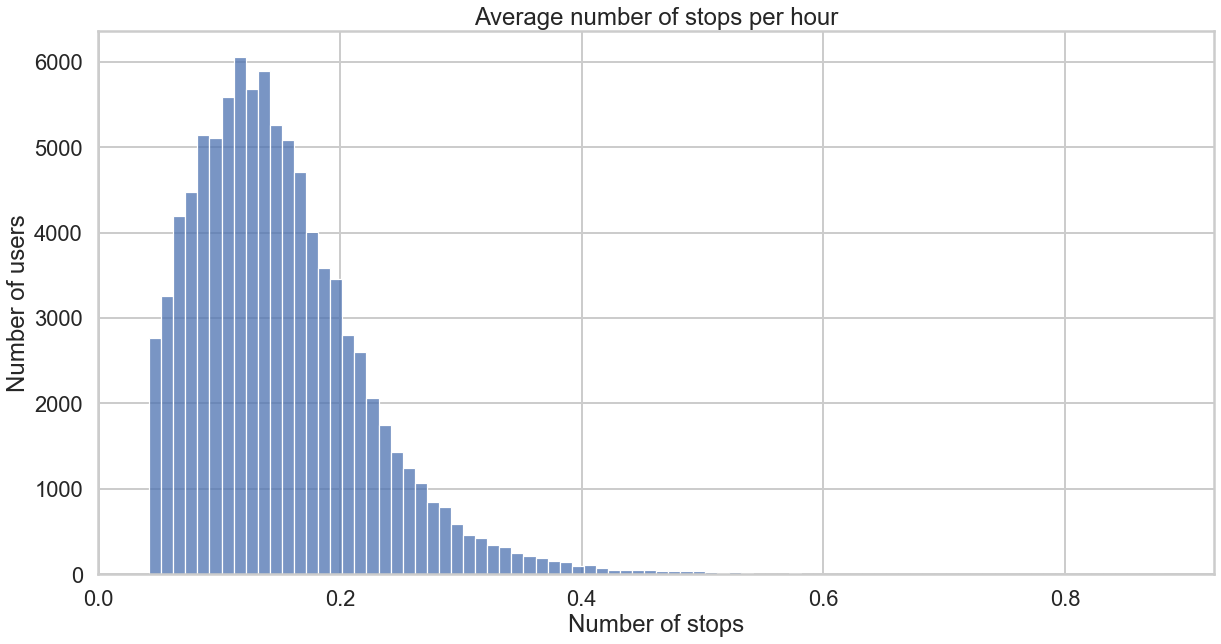

In [8]:
sns.histplot(data=stop, x="avgHStop", binwidth = 0.01)
plt.title('Average number of stops per hour')
plt.ylabel('Number of users')
plt.xlabel('Number of stops')
plt.show()

In [9]:
dfPlot = df.reset_index()

In [10]:
dfPlot

,index,userId,incrementalId,POIId,weekday,hour,minutes_spent,stop_type,name1_fs,name2_fs
0,0,0,1,NaN,4,0,1881.216667,home,NaN,NaN
1,1,0,2,NaN,5,8,40.400000,other,NaN,NaN
2,2,0,3,1.202591e+12,5,10,77.350000,poi,Shop & Service,Tailor Shop
3,3,0,4,NaN,5,11,376.450000,home,NaN,NaN
4,4,0,5,1.202591e+12,5,18,5.216667,poi,Shop & Service,Tailor Shop
...,...,...,...,...,...,...,...,...,...,...
20071654,20071654,403726927905,61,NaN,6,8,5.083333,home,NaN,NaN
20071655,20071655,403726927905,62,1.537598e+12,6,9,63.316667,poi,Professional & Other Places,School
20071656,20071656,403726927905,63,NaN,6,11,233.016667,home,NaN,NaN
20071657,20071657,403726927905,64,NaN,6,18,1609.166667,home,NaN,NaN


In [11]:
#daily stop
dayCount = df.groupby('weekday').count().reset_index()
dayCount

,weekday,userId,incrementalId,POIId,hour,minutes_spent,stop_type,name1_fs,name2_fs
0,1,2176226,2176226,689641,2176226,2176226,2176226,689641,689641
1,2,2670557,2670557,668341,2670557,2670557,2670557,668341,668341
2,3,2798403,2798403,684302,2798403,2798403,2798403,684302,684302
3,4,3080980,3080980,772492,3080980,3080980,3080980,772492,772492
4,5,3164217,3164217,798850,3164217,3164217,3164217,798850,798850
5,6,3349845,3349845,909428,3349845,3349845,3349845,909428,909428
6,7,2831431,2831431,962346,2831431,2831431,2831431,962346,962346


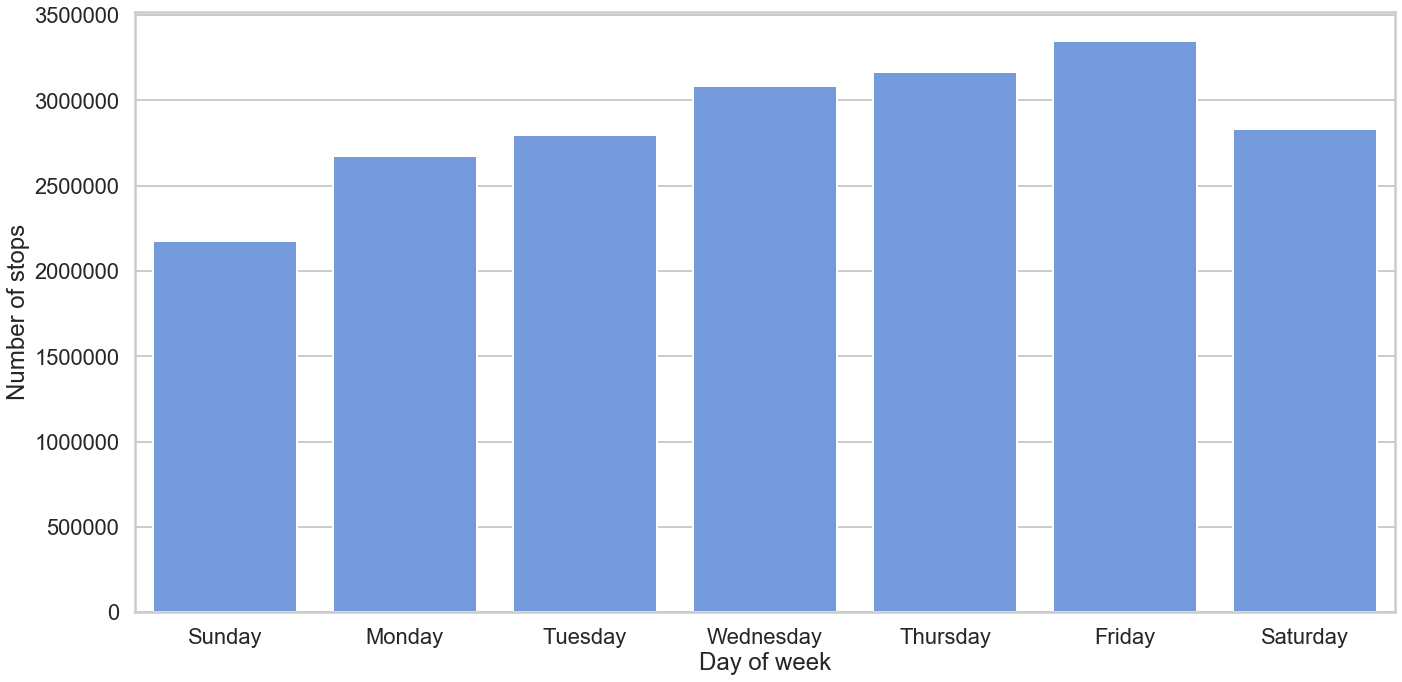

In [12]:
ax = sns.barplot(x = 'weekday', y = 'stop_type', data= dayCount, color = 'cornflowerblue')
plt.xlabel('Day of week')
plt.ylabel('Number of stops')
ax.set_xticklabels(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.tight_layout()
plt.savefig('dayStop.png', bbox_inches='tight') #Save plot

In [13]:
#daily stop
hourCount = df.groupby('hour').count().reset_index()
hourCount

,hour,userId,incrementalId,POIId,weekday,minutes_spent,stop_type,name1_fs,name2_fs
0,0,198855,198855,30513,198855,198855,198855,30513,30513
1,1,131000,131000,20218,131000,131000,131000,20218,20218
2,2,93195,93195,14940,93195,93195,93195,14940,14940
3,3,79701,79701,13729,79701,79701,79701,13729,13729
4,4,90137,90137,18043,90137,90137,90137,18043,18043
5,5,156501,156501,34482,156501,156501,156501,34482,34482
6,6,357005,357005,67962,357005,357005,357005,67962,67962
7,7,1037824,1037824,170183,1037824,1037824,1037824,170183,170183
8,8,1122320,1122320,238190,1122320,1122320,1122320,238190,238190
9,9,1028146,1028146,294615,1028146,1028146,1028146,294615,294615


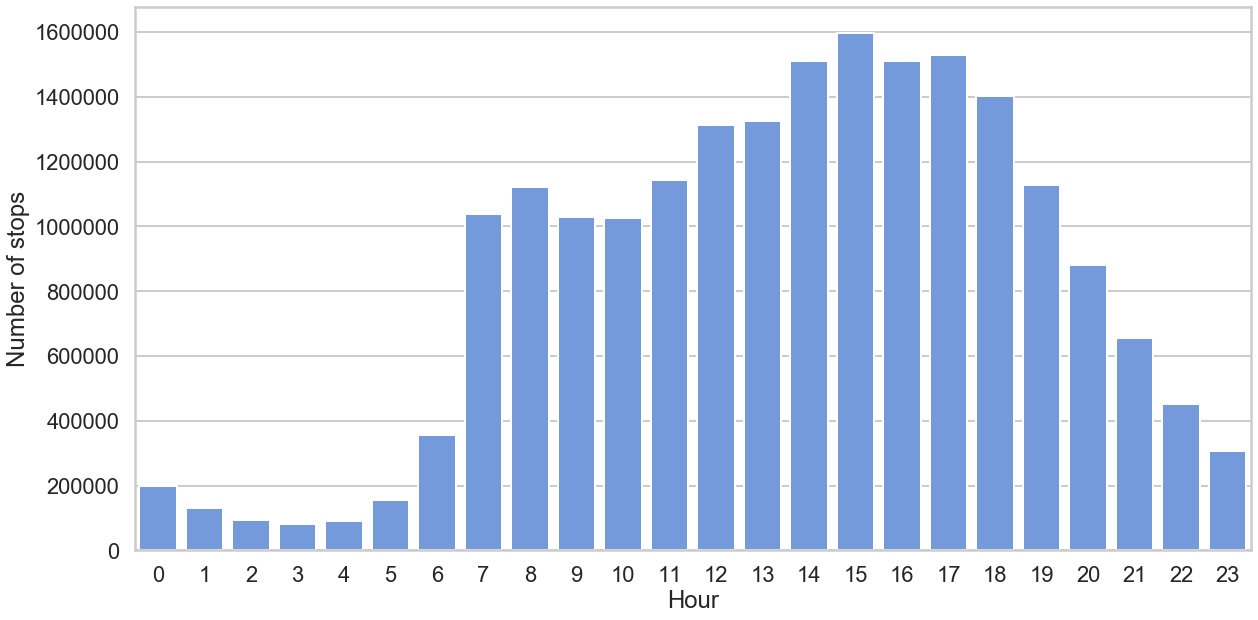

In [14]:
sns.barplot(x = 'hour', y = 'stop_type', data=hourCount, color = 'cornflowerblue')
plt.savefig('hourStop.png', bbox_inches='tight') #Save plot
plt.xlabel('Hour')
plt.ylabel('Number of stops')
plt.show()

In [15]:
#Time of week 
df['TimeOfWeek'] = (df['weekday']-1) * 24  + df['hour']
df

,userId,incrementalId,POIId,weekday,hour,minutes_spent,stop_type,name1_fs,name2_fs,TimeOfWeek
0,0,1,NaN,4,0,1881.216667,home,NaN,NaN,72
1,0,2,NaN,5,8,40.400000,other,NaN,NaN,104
2,0,3,1.202591e+12,5,10,77.350000,poi,Shop & Service,Tailor Shop,106
3,0,4,NaN,5,11,376.450000,home,NaN,NaN,107
4,0,5,1.202591e+12,5,18,5.216667,poi,Shop & Service,Tailor Shop,114
...,...,...,...,...,...,...,...,...,...,...
20071654,403726927905,61,NaN,6,8,5.083333,home,NaN,NaN,128
20071655,403726927905,62,1.537598e+12,6,9,63.316667,poi,Professional & Other Places,School,129
20071656,403726927905,63,NaN,6,11,233.016667,home,NaN,NaN,131
20071657,403726927905,64,NaN,6,18,1609.166667,home,NaN,NaN,138


In [16]:
#stop at hour of week
WeekTimeCount = df.groupby('TimeOfWeek').count().reset_index()
WeekTimeCount

,TimeOfWeek,userId,incrementalId,POIId,weekday,hour,minutes_spent,stop_type,name1_fs,name2_fs
0,0,42922,42922,7020,42922,42922,42922,42922,7020,7020
1,1,27500,27500,4566,27500,27500,27500,27500,4566,4566
2,2,18435,18435,3104,18435,18435,18435,18435,3104,3104
3,3,13912,13912,2363,13912,13912,13912,13912,2363,2363
4,4,11834,11834,2190,11834,11834,11834,11834,2190,2190
...,...,...,...,...,...,...,...,...,...,...
163,163,165468,165468,56118,165468,165468,165468,165468,56118,56118
164,164,135666,135666,38450,135666,135666,135666,135666,38450,38450
165,165,114284,114284,26604,114284,114284,114284,114284,26604,26604
166,166,94927,94927,18146,94927,94927,94927,94927,18146,18146


In [17]:
#list with 0 to 23
HList = list(range(0,24))

#list from 0 to 23 7 times
HourList = 7*HList

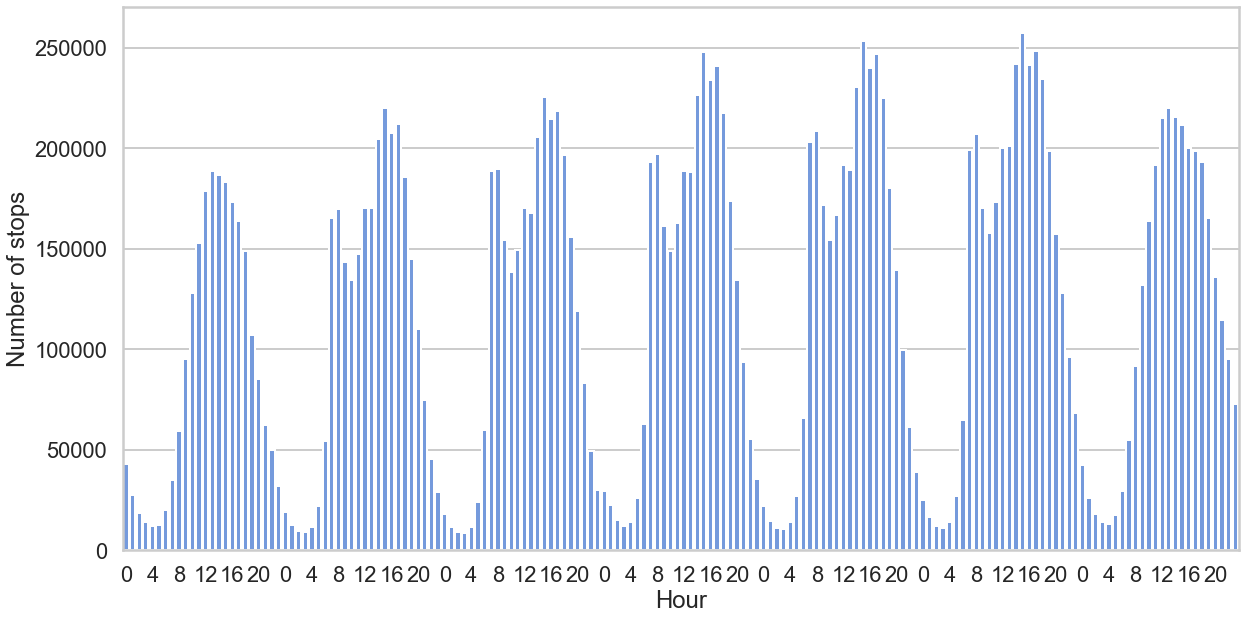

In [18]:
ax = sns.barplot(x = 'TimeOfWeek', y = 'stop_type', data=WeekTimeCount, color = 'cornflowerblue')
                 #palette = sns.color_palette("hls", n_colors = 24), lw=0.)
ax.set(xticks=(WeekTimeCount['TimeOfWeek'][::4]))
ax.set(xticklabels = (HourList[::4]))

ax.set(xlabel='Hour', ylabel='Number of stops')
plt.savefig('TimeOfWeek.png', bbox_inches='tight') #Save plot

In [19]:
day1 = df[df['weekday'] ==1].groupby('TimeOfWeek').count().reset_index()
day2 = df[df['weekday'] ==2].groupby('TimeOfWeek').count().reset_index()
day3 = df[df['weekday'] ==3].groupby('TimeOfWeek').count().reset_index()
day4 = df[df['weekday'] ==4].groupby('TimeOfWeek').count().reset_index()
day5 = df[df['weekday'] ==5].groupby('TimeOfWeek').count().reset_index()
day6 = df[df['weekday'] ==6].groupby('TimeOfWeek').count().reset_index()
day7 = df[df['weekday'] ==7].groupby('TimeOfWeek').count().reset_index()

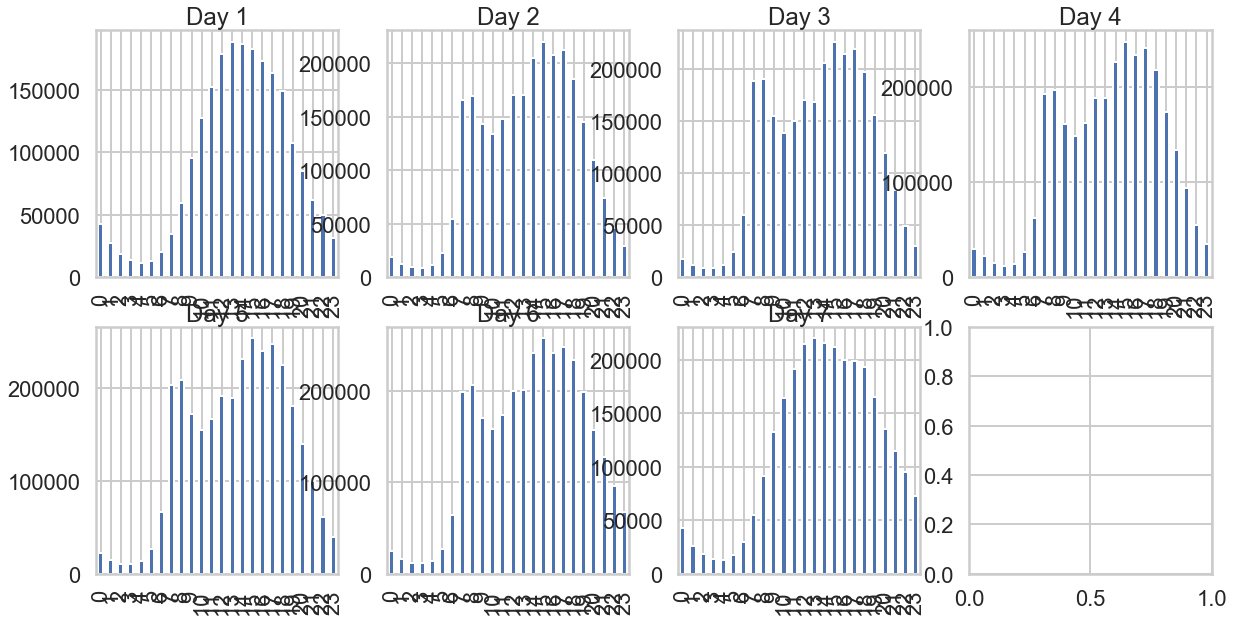

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=4)

day1['stop_type'].plot.bar(ax=axes[0,0], title = 'Day 1')
day2['stop_type'].plot.bar(ax=axes[0,1], title = 'Day 2')
day3['stop_type'].plot.bar(ax=axes[0,2], title = 'Day 3')
day4['stop_type'].plot.bar(ax=axes[0,3], title = 'Day 4')
day5['stop_type'].plot.bar(ax=axes[1,0], title = 'Day 5')
day6['stop_type'].plot.bar(ax=axes[1,1], title = 'Day 6')
day7['stop_type'].plot.bar(ax=axes[1,2], title = 'Day 7')

plt.savefig('hourOfWeek.png') #Save plot
plt.show()

In [21]:
#count of stops at the 4 stop categories
stopTypeCount = df.groupby(['userId', 'stop_type']).count()['incrementalId'].unstack().fillna(0)

In [22]:
#If assumed, all users is part of the data in 60 days.
avgHome = (stopTypeCount['home']/60).reset_index()
avgWork = (stopTypeCount['work']/60).reset_index()
avgother = (stopTypeCount['other']/60).reset_index()
avgPoi = (stopTypeCount['poi']/60).reset_index()

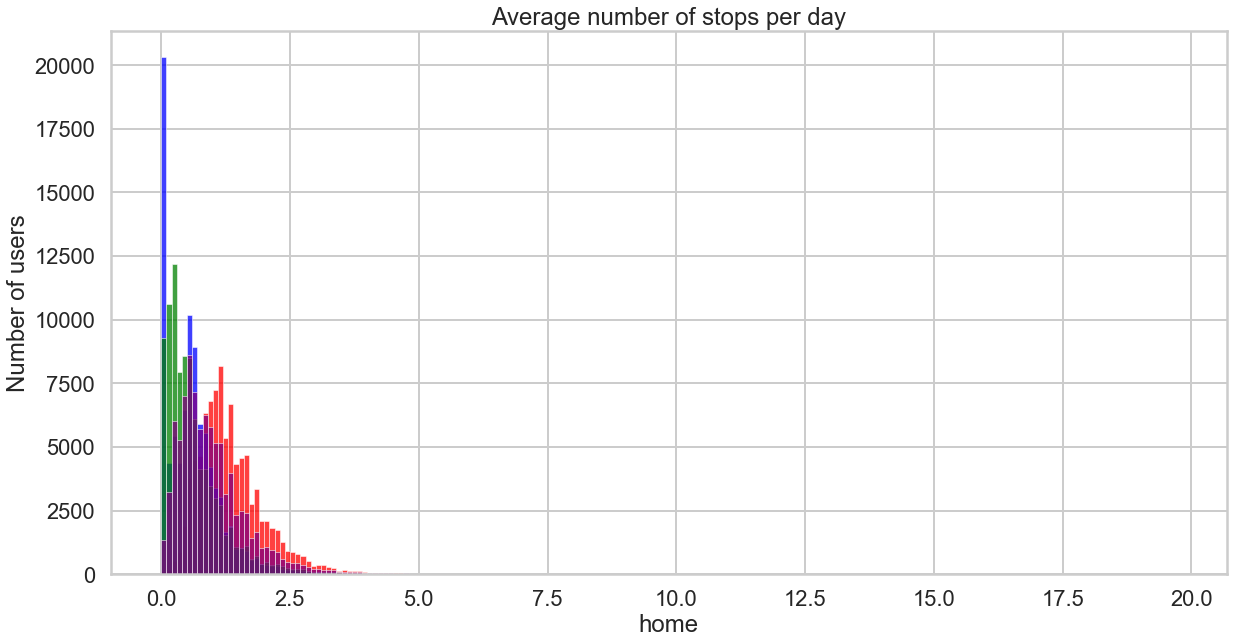

In [23]:
#Might not be very usefull
sns.histplot(data=avgHome, x="home", binwidth = 0.1, color = 'red')
sns.histplot(data=avgWork, x="work", binwidth = 0.1, color = 'blue')
sns.histplot(data=avgother, x="other", binwidth = 0.1, color = 'green')
sns.histplot(data=avgPoi, x="poi", binwidth = 0.1, color = 'purple')
plt.title('Average number of stops per day')
plt.ylabel('Number of users')
plt.show()

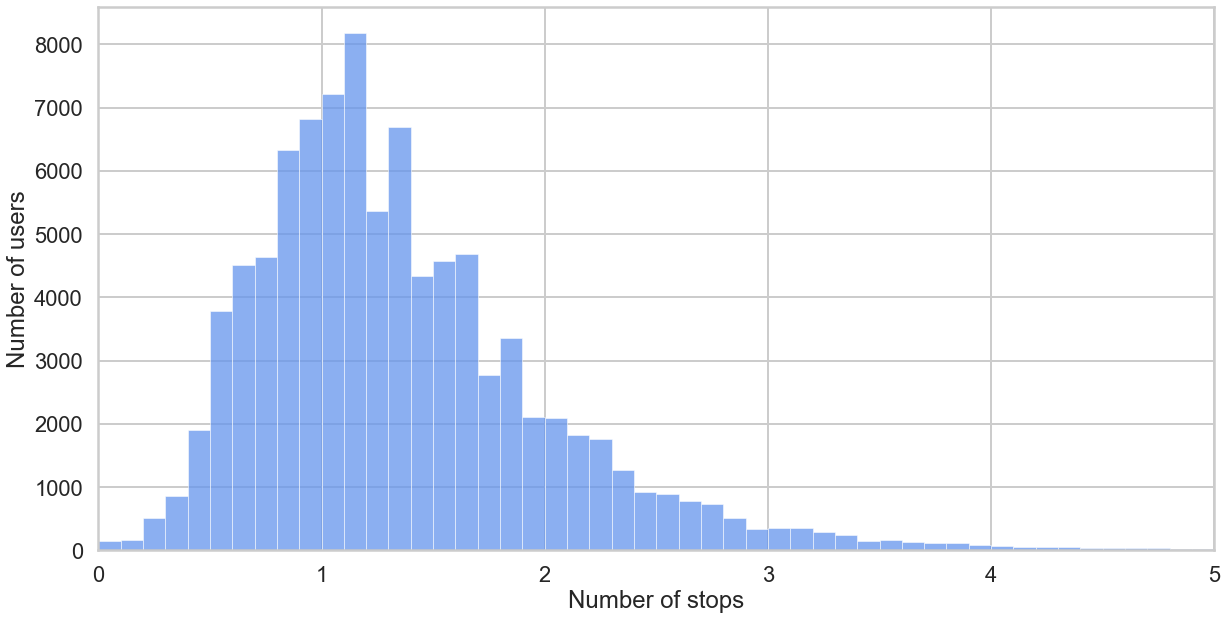

In [24]:
sns.histplot(data=avgHome, x="home", binwidth = 0.1, color = 'cornflowerblue')
plt.xlabel('Number of stops')
plt.ylabel('Number of users')
plt.xlim([0, 5])
plt.savefig('avgHome.png', bbox_inches='tight') #Save plot
plt.show()

In [25]:
print(avgHome['home'].quantile(0.25))
print(avgHome['home'].quantile(0.75))

0.9
1.6666666666666667


In [26]:
avgHome['home'].median()

1.2333333333333334

In [27]:
max(avgHome['home'])

19.6

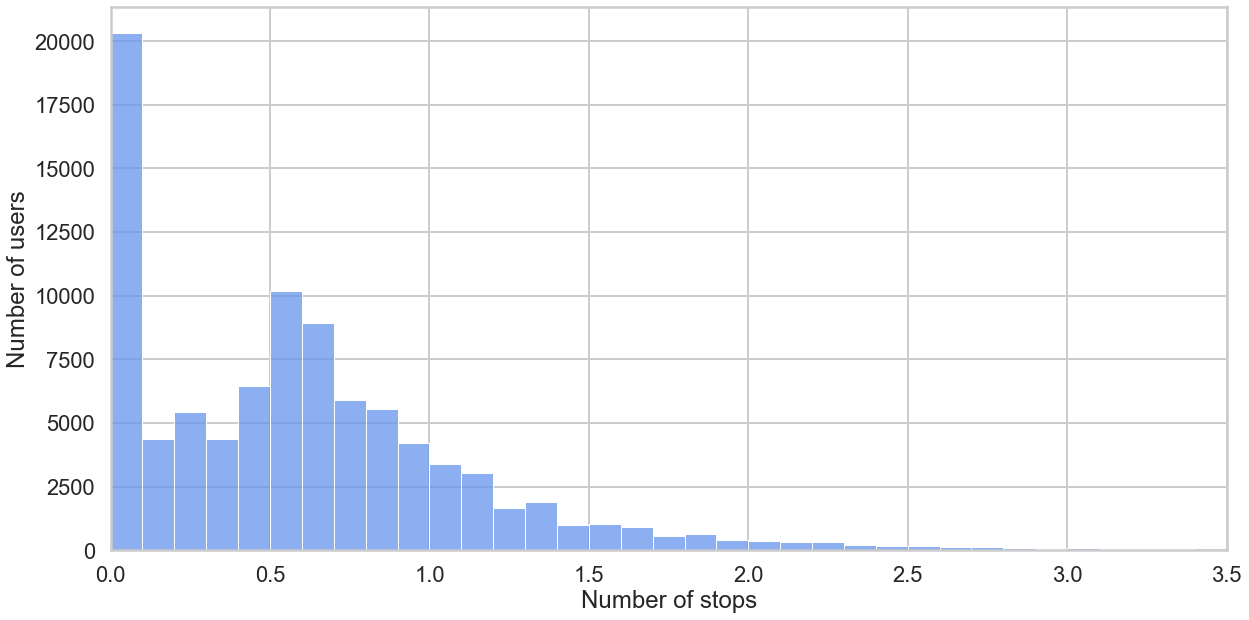

In [28]:
sns.histplot(data=avgWork, x="work", binwidth = 0.1, color='cornflowerblue')
plt.xlabel('Number of stops')
plt.ylabel('Number of users')
plt.xlim([0, 3.5])
plt.savefig('avgWork.png', bbox_inches='tight') #Save plot
plt.show()

In [29]:
print(avgWork['work'].quantile(0.25))
print(avgWork['work'].quantile(0.75))

0.15
0.85


In [30]:
avgWork['work'].median()

0.55

In [31]:
max(avgWork['work'])

10.133333333333333

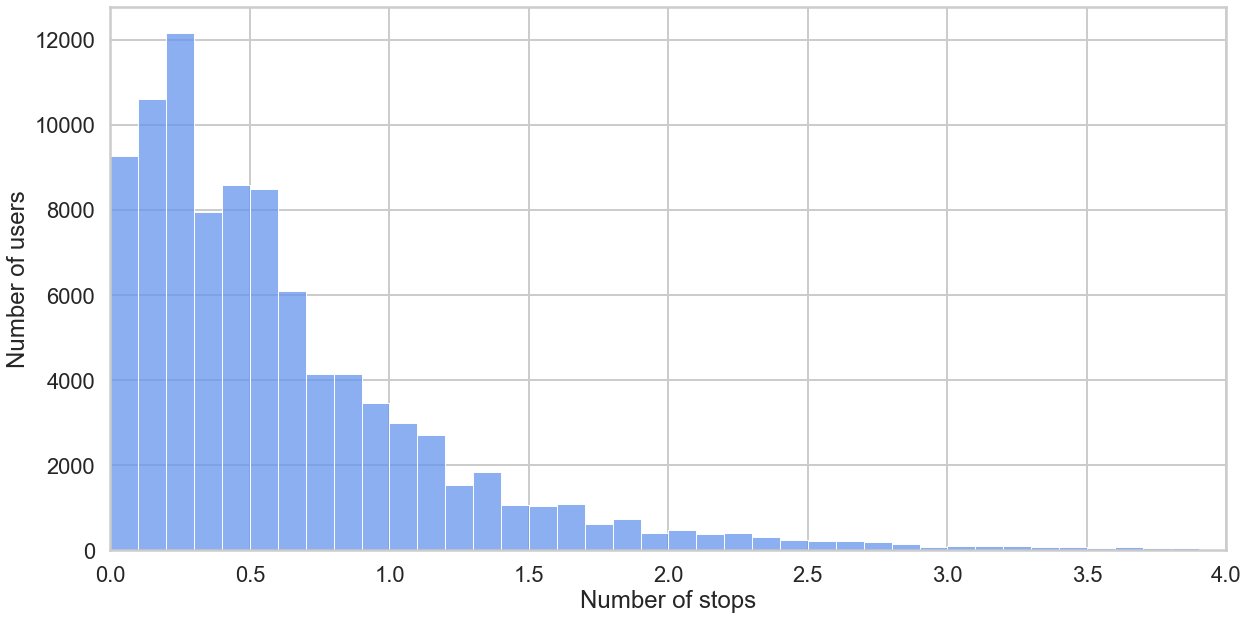

In [32]:
sns.histplot(data=avgother, x="other", binwidth = 0.1, color ='cornflowerblue')
plt.xlabel('Number of stops')
plt.ylabel('Number of users')
plt.xlim([0, 4])
plt.savefig('avgOther.png', bbox_inches='tight') #Save plot
plt.show()

In [33]:
print(avgother['other'].quantile(0.25))
print(avgother['other'].quantile(0.75))

0.21666666666666667
0.85


In [34]:
avgother['other'].median()

0.4666666666666667

In [35]:
max(avgother['other'])

10.666666666666666

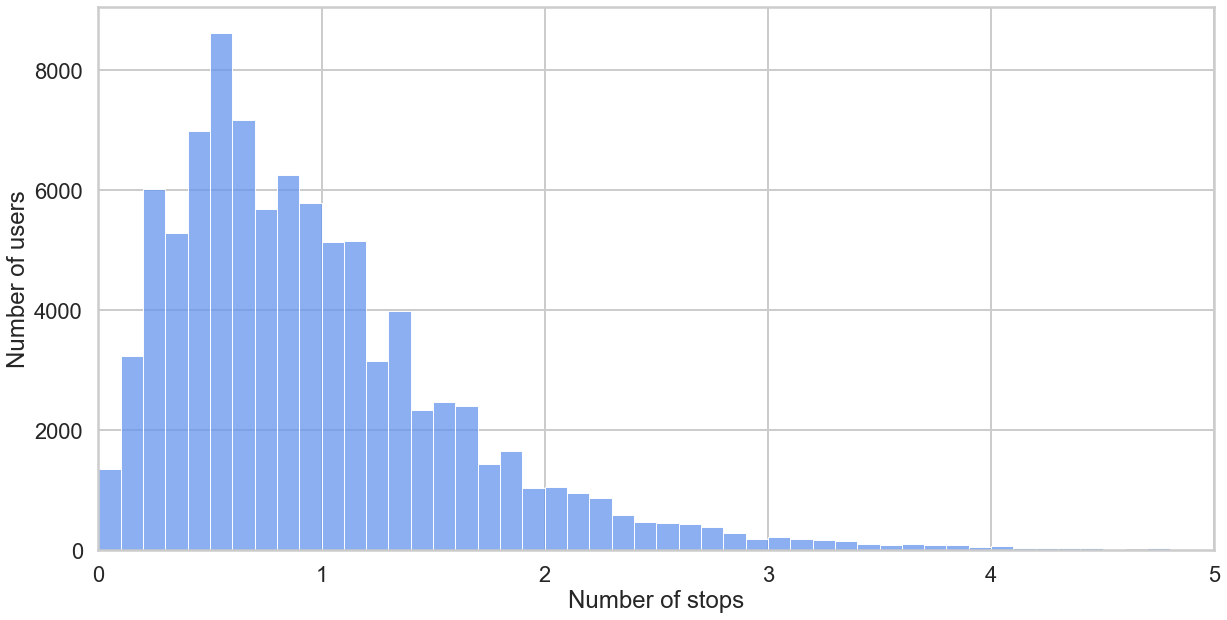

In [36]:
sns.histplot(data=avgPoi, x="poi", binwidth = 0.1, color = 'cornflowerblue')
plt.xlabel('Number of stops')
plt.ylabel('Number of users')
plt.xlim([0, 5])
plt.savefig('avgPOI.png', bbox_inches='tight') #Save plot
plt.show()

In [37]:
print(avgPoi['poi'].quantile(0.25))
print(avgPoi['poi'].quantile(0.75))

0.5
1.2833333333333334


In [38]:
avgPoi['poi'].median()

0.8166666666666667

In [39]:
max(avgPoi['poi'])

10.766666666666667